In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

permittivity_real = np.random.uniform(0.01, 0.5, 1000)
permittivity_imaginary = np.random.uniform(0.01, 0.5, 1000)
data = {
    'Frequency': np.linspace(1.0, 2.0, 1000),
    'Real': np.random.uniform(0.01, 0.5, 1000),
    'Imaginary': np.random.uniform(0.01, 0.5, 1000)
}
df = pd.DataFrame(data)
print(f"Output: {permittivity_real}")
print(f"Output: {permittivity_imaginary}")
print(f"Dataframe: ")
print(df)

Output: [0.36305639 0.38273962 0.41304716 0.26344049 0.1388731  0.37033345
 0.08118079 0.35211459 0.09616297 0.48605187 0.23996229 0.33280664
 0.35973091 0.43288493 0.46578643 0.37624287 0.24886382 0.40881041
 0.36925021 0.48422754 0.28503596 0.15684694 0.2569075  0.48087686
 0.34618394 0.47428408 0.17723395 0.06686106 0.23405022 0.19118644
 0.26124368 0.37601237 0.4214722  0.1964627  0.04882401 0.1701687
 0.11868002 0.30775702 0.04887441 0.41537106 0.47795712 0.36909346
 0.23819789 0.36284238 0.17515067 0.13906401 0.19000563 0.04788713
 0.4484057  0.12844633 0.19347824 0.04634377 0.18635163 0.18319388
 0.19319608 0.42715346 0.29636777 0.29174985 0.21677885 0.31859689
 0.29615167 0.27961477 0.14328572 0.42706453 0.17265984 0.03759084
 0.11831913 0.29888847 0.09493888 0.07365852 0.48797108 0.32330093
 0.31120651 0.1824784  0.03673767 0.16204393 0.36732358 0.27907636
 0.36782367 0.43457005 0.1114058  0.40118042 0.42905525 0.48355428
 0.15651345 0.10651903 0.27196815 0.02156452 0.10897063

In [12]:
X = df.values
y = np.array([permittivity_real, permittivity_imaginary]).T

In [13]:
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]
split_point = int(0.8 * len(X))
X_train = X[:split_point]
y_train = y[:split_point]
X_val = X[split_point:]
y_val = y[split_point:]

In [14]:
X_train.shape

(800, 3)

In [15]:
y_train.shape

(800, 2)

In [16]:
X_val.shape

(200, 3)

In [17]:
y_val.shape

(200, 2)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(y.shape[1])
])
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               512       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 10914 (42.63 KB)
Trainable params: 10914 (42.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20


800/800 [==============================] - 1s 485us/step - loss: 0.0227 - accuracy: 0.5150 - val_loss: 0.0246 - val_accuracy: 0.4750
Epoch 2/20
800/800 [==============================] - 0s 434us/step - loss: 0.0204 - accuracy: 0.5075 - val_loss: 0.0219 - val_accuracy: 0.5250
Epoch 3/20
800/800 [==============================] - 0s 428us/step - loss: 0.0201 - accuracy: 0.5075 - val_loss: 0.0189 - val_accuracy: 0.4750
Epoch 4/20
800/800 [==============================] - 0s 441us/step - loss: 0.0200 - accuracy: 0.4888 - val_loss: 0.0186 - val_accuracy: 0.4750
Epoch 5/20
800/800 [==============================] - 0s 476us/step - loss: 0.0199 - accuracy: 0.5175 - val_loss: 0.0203 - val_accuracy: 0.4750
Epoch 6/20
800/800 [==============================] - 0s 427us/step - loss: 0.0198 - accuracy: 0.4925 - val_loss: 0.0188 - val_accuracy: 0.4750
Epoch 7/20
800/800 [==============================] - 0s 426us/step - loss: 0.0197 - accuracy: 0.4875 - val_loss: 0.0190 - val_accuracy: 0.4750
Epo

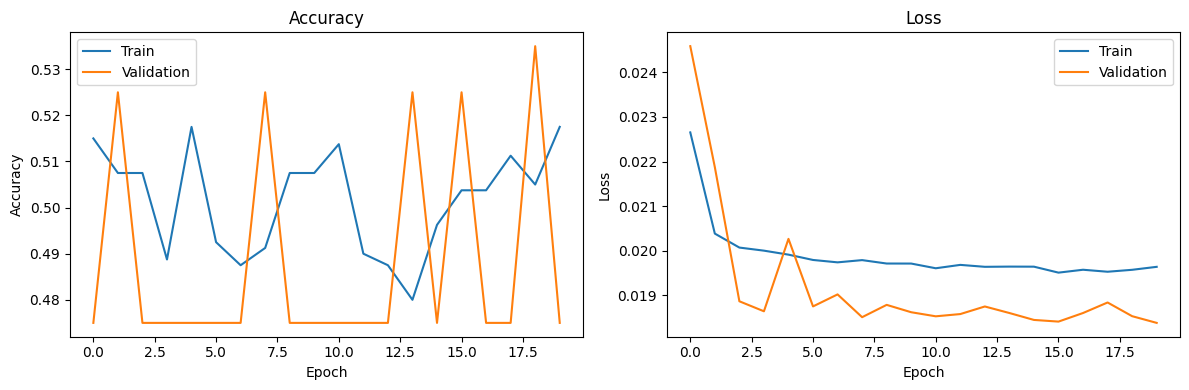

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=1)

# Plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()
